<a href="https://colab.research.google.com/github/marioesm/TFM---CODIGO/blob/main/Data_Transformation_Corr%2C_PCA___FAMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conectando Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Instalando paqueterías

In [3]:
!pip install -q skimpy # Clean columns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 8.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.25.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.


In [4]:
!pip install -q prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.1/415.1 kB 5.0 MB/s eta 0:00:00



# Importando librerías

In [5]:
import numpy as np
import pandas as pd
import prince

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
from skimpy import clean_columns

# Importando datos

In [8]:
file_path = '/content/gdrive/MyDrive/UCM/Mario/Data/el-futuro-es-clima-anonimizado_pre_pca.csv'
df_encuesta = pd.read_csv(file_path)

In [9]:
df_encuesta.iloc[0:1,:]

,provincia,precios_energia,modelo_productivo,viajes_frecuentemente,ocupacion,cop_cumbre,vivir_padres_1_10,solucion_crisis_vendra,genero,origen,...,ley_congreso_crisis_climatica_sin_stopwords_lemma,haria_falta_futuro_sin_stopwords_lemma,transicion_ecologica_sin_stopwords_lemma_salida,haria_falta_futuro_sin_stopwords_lemma_salida,transicion_ecologica_sin_stopwords_lemma_salida_neu,transicion_ecologica_sin_stopwords_lemma_salida_pos,transicion_ecologica_sin_stopwords_lemma_salida_neg,haria_falta_futuro_sin_stopwords_lemma_salida_neu,haria_falta_futuro_sin_stopwords_lemma_salida_pos,haria_falta_futuro_sin_stopwords_lemma_salida_neg
0,badajoz,por ahora bien pero si sigue así no sé que voy...,"sí, hace falta apostar por la soberanía energé...",dentro de españa,"actualmente estoy trabajando, pero no de lo qu...",no sé lo que son las cop,10.0,de un cambio de modelo económico,hombre,nací en españa,...,restringir uso vehículo privado verdad solo us...,educación inicio,"{NEG: 0.719, NEU: 0.264, POS: 0.017}","{NEU: 0.494, NEG: 0.354, POS: 0.152}",0.264,0.017,0.719,0.494,0.152,0.354


# Transformación de datos

## Min Max Scaling


In [10]:
scaler = MinMaxScaler()

In [11]:
#columnas mas influyentes con lo que respecta el cambio climatico
columnas_num = [
 'crisis_climatica_es_un_tema_que_me_cansa_ya',
 'crisis_climatica_me_agobia',
 'crisis_climatica_me_da_igual',
 'crisis_climatica_me_preocupa',
 'crisis_climatica_se_le_esta_dando_demasiada_importancia',
 'crisis_climatica_siento_esperanza',
 'crisis_climatica_tengo_miedo',
 'vivir_padres_1_10',
 'cambio_climatico_medios_de_comunicacion_niveles',
 'crisis-climatica-vida-personal_niveles',
 'las-actuales-politicas-climaticas_niveles',
 'futuro_niveles',
 'ecoansiedad_niveles',
 'transicion_ecologica_sin_stopwords_lemma_salida_neu',
 'transicion_ecologica_sin_stopwords_lemma_salida_pos',
 'transicion_ecologica_sin_stopwords_lemma_salida_neg',
 'haria_falta_futuro_sin_stopwords_lemma_salida_neu',
 'haria_falta_futuro_sin_stopwords_lemma_salida_pos',
 'haria_falta_futuro_sin_stopwords_lemma_salida_neg']

In [12]:
columnas_texto = [
 'precios_energia']

In [13]:
df_std_num = df_encuesta[columnas_num].copy()
df_texto = df_encuesta[columnas_texto].copy()

## Agrupando frecuencias bajas

In [14]:
def frecuencia_columna(df_cat, columna):
  cat_freq = (df_cat[columna].value_counts())/df_cat.shape[0]
  less_freq = cat_freq[cat_freq<=0.05]
  df_cat.loc[df_cat[columna].isin(less_freq.index.tolist()), columna] = "Otra"
  return df_cat

In [15]:
for columna in columnas_texto:
  df_texto = frecuencia_columna(df_texto, columna)

In [16]:
df_std = scaler.fit_transform(df_std_num)

## Removiendo columnas con alta correlación

In [17]:
df_cont = pd.DataFrame(df_std, columns=df_std_num.columns)

In [18]:
corr_matrix = df_cont.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encuentra características con correlación superior a 0,8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# las elimina
df_cont.drop(to_drop, axis=1, inplace=True)

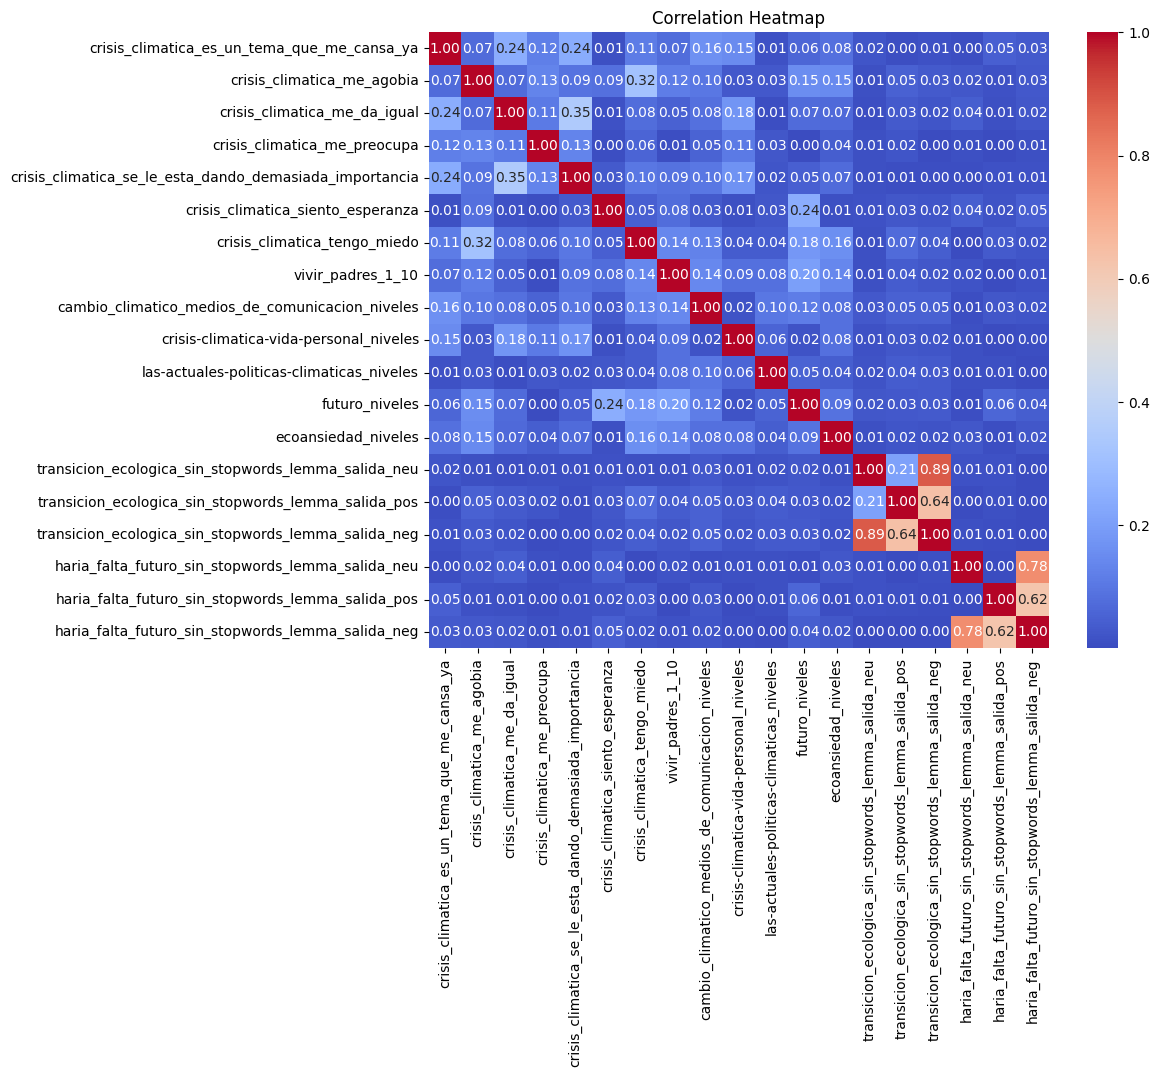

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea el mapa de calor de la matriz de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [20]:
to_drop

['transicion_ecologica_sin_stopwords_lemma_salida_neg']

## Concatenando resultados

In [21]:
result = pd.concat([df_cont, df_texto], axis=1)

In [22]:
len(result.columns.to_list())

19

# FAMD Factor analysis of mixed data

In [23]:
famd = prince.FAMD(
    n_components=8,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"  # same parameter as sklearn.preprocessing.OneHotEncoder
)

In [24]:
famd = famd.fit(result)

In [25]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,2.117,10.85%,10.85%
1,2.018,10.35%,21.20%
2,1.594,8.17%,29.38%
3,1.195,6.13%,35.50%
4,1.126,5.78%,41.28%
5,1.080,5.54%,46.81%
6,1.018,5.22%,52.04%
7,0.980,5.03%,57.07%


In [26]:
famd.column_coordinates_

component,0,1,2,3,4,5,6,7
variable,,,,,,,,
crisis_climatica_es_un_tema_que_me_cansa_ya,0.198551,6.195439e-02,0.115223,0.000217,0.014528,0.021505,0.005962,0.004197
crisis_climatica_me_agobia,0.260517,5.570047e-03,0.031858,0.000044,0.008538,0.302715,0.006560,0.004512
crisis_climatica_me_da_igual,0.191871,6.230605e-02,0.192482,0.000429,0.001497,0.037590,0.027934,0.017373
crisis_climatica_me_preocupa,0.064204,9.204816e-03,0.083463,0.020006,0.062033,0.072392,0.086057,0.218333
crisis_climatica_se_le_esta_dando_demasiada_importancia,0.215992,5.781398e-02,0.185396,0.001449,0.009289,0.016138,0.001444,0.023843
crisis_climatica_siento_esperanza,0.042610,7.135356e-03,0.088059,0.016091,0.454904,0.061597,0.010714,0.009804
crisis_climatica_tengo_miedo,0.270121,6.985644e-03,0.063362,0.000278,0.002012,0.199333,0.000001,0.000853
vivir_padres_1_10,0.171916,3.371744e-03,0.105408,0.020372,0.020709,0.052066,0.000001,0.009382
cambio_climatico_medios_de_comunicacion_niveles,0.172169,6.335993e-03,0.016517,0.002522,0.040309,0.095525,0.004395,0.153631


In [27]:
famd.plot(
    result,
    x_component=0,
    y_component=1
)

alt.LayerChart(...)

In [28]:
famd.column_contributions_.style.format('{:.0%}')

component,0,1,2,3,4,5,6,7
variable,,,,,,,,
crisis_climatica_es_un_tema_que_me_cansa_ya,9%,3%,7%,0%,1%,2%,1%,0%
crisis_climatica_me_agobia,12%,0%,2%,0%,1%,28%,1%,0%
crisis_climatica_me_da_igual,9%,3%,12%,0%,0%,3%,3%,2%
crisis_climatica_me_preocupa,3%,0%,5%,2%,6%,7%,8%,22%
crisis_climatica_se_le_esta_dando_demasiada_importancia,10%,3%,12%,0%,1%,1%,0%,2%
crisis_climatica_siento_esperanza,2%,0%,6%,1%,40%,6%,1%,1%
crisis_climatica_tengo_miedo,13%,0%,4%,0%,0%,18%,0%,0%
vivir_padres_1_10,8%,0%,7%,2%,2%,5%,0%,1%
cambio_climatico_medios_de_comunicacion_niveles,8%,0%,1%,0%,4%,9%,0%,16%


In [29]:
loadings = famd.transform(result)

In [30]:
loadings.to_csv('/content/gdrive/MyDrive/UCM/Mario/Data/el-futuro-es-clima-anonimizado_pre_cluster.csv', index=False)

Se comprueba que el metodo de Análisis factorial no es el más adecuado puesto que al utilizar 8 factores tan solo se explica el 57% de la varianza total por lo que se procederá a realizar PCA.

# PCA Principal Component Analysis

In [31]:
from sklearn.decomposition import PCA

In [32]:
def nuevas_columnas(df, column_name):
    df_salida = df[column_name].str.replace("\s+(?=\|)", "", regex=True).str.get_dummies()
    df_salida.columns = [f"{column_name}_{col}" for col in df_salida.columns]
    df_salida = clean_columns(df_salida)
    df_salida = pd.concat(
    (df.drop([column_name], axis=1), df_salida),
    axis=1,)
    return df_salida

In [33]:
for i in range(len(columnas_texto)):
  result = nuevas_columnas(result, columnas_texto[i])

In [34]:
result.drop(columns=['precios_energia_otra'],inplace=True)

In [35]:
pca = PCA()

In [36]:
pca.fit(result)

PCA()

In [37]:
pca.explained_variance_ratio_

array([1.78351413e-01, 1.69771703e-01, 8.98170666e-02, 8.45847631e-02,
       7.10386804e-02, 6.63506600e-02, 5.77612427e-02, 4.47396386e-02,
       4.37460924e-02, 4.27959274e-02, 3.30154794e-02, 2.64076722e-02,
       2.28978243e-02, 1.97251735e-02, 1.48293034e-02, 1.31736408e-02,
       1.11325308e-02, 4.40645572e-03, 3.15120990e-03, 2.30347559e-03,
       4.69617567e-08])

In [38]:
pca.explained_variance_

array([3.44594920e-01, 3.28017960e-01, 1.73536640e-01, 1.63427243e-01,
       1.37254693e-01, 1.28196912e-01, 1.11601195e-01, 8.64419966e-02,
       8.45223539e-02, 8.26865287e-02, 6.37896068e-02, 5.10225827e-02,
       4.42411631e-02, 3.81112461e-02, 2.86518763e-02, 2.54529505e-02,
       2.15092973e-02, 8.51376636e-03, 6.08849074e-03, 4.45057303e-03,
       9.07353777e-08])

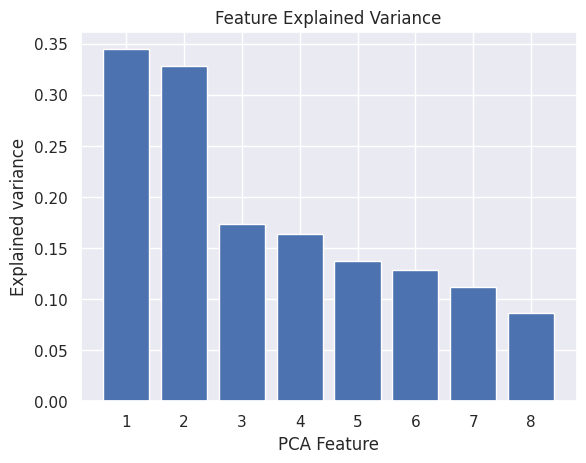

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=8)

# Fit and transform data
pca.fit_transform(result)

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )


plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

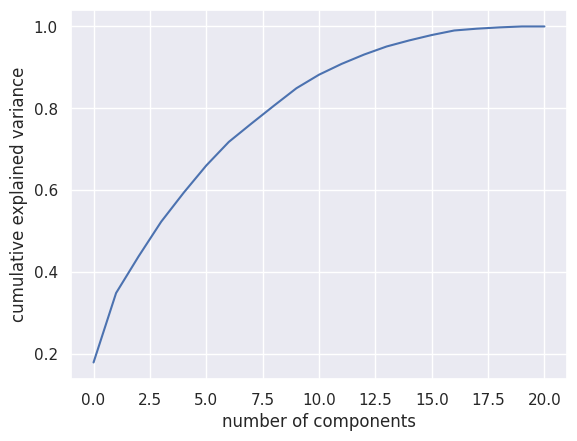

In [40]:
pca = PCA().fit(result)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [41]:
np.cumsum(pca.explained_variance_ratio_)

array([0.17835141, 0.34812312, 0.43794018, 0.52252495, 0.59356363,
       0.65991429, 0.71767553, 0.76241517, 0.80616126, 0.84895719,
       0.88197267, 0.90838034, 0.93127816, 0.95100334, 0.96583264,
       0.97900628, 0.99013881, 0.99454527, 0.99769648, 0.99999995,
       1.        ])

In [42]:
len(result.columns.to_list())

21

Text(0, 0.5, 'Cumulative Explained Variance')

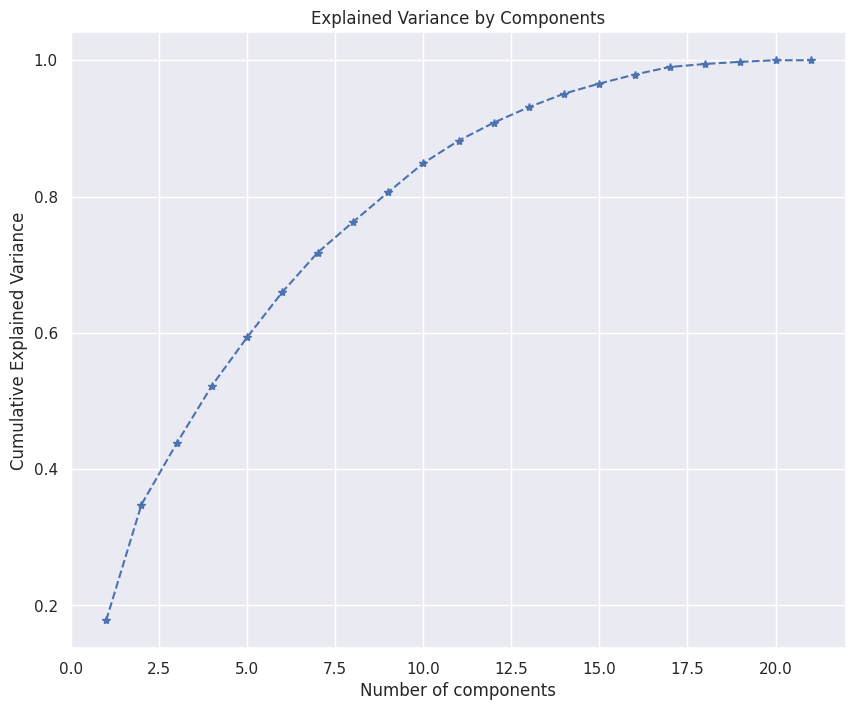

In [43]:
plt.figure(figsize=(10,8))
plt.plot(range(1,len(result.columns)+1), pca.explained_variance_ratio_.cumsum(), marker='*', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

In [44]:
componentes=8
pca = PCA(n_components=componentes)


In [45]:
# Reformat and view results
loadings = pd.DataFrame(pca.fit_transform(result),
columns=['PC%s' % _ for _ in range(1,componentes+1)],  index=result.index)

In [46]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.540911,-0.350949,0.074318,-0.060599,-0.070559,-0.380636,0.238780,0.055975
1,1.003496,-0.577169,0.205593,-0.035895,0.340446,-0.312103,0.075348,-0.029252
2,0.169404,0.986208,-0.862286,0.535702,0.274352,0.634600,0.201766,-0.022264
3,0.798489,-0.523492,-0.016899,-0.077170,0.004095,0.195877,-0.447975,0.282096
4,0.254601,0.650970,-0.023426,0.709921,-0.844018,-0.307330,-0.142645,0.021259
...,...,...,...,...,...,...,...,...
3097,1.268259,0.457872,0.983221,0.449955,-0.287797,0.185977,-0.405777,-0.323764
3098,0.126509,0.695501,-0.084076,0.754289,-0.871341,0.054354,-0.494081,-0.020346
3099,0.451895,0.895759,-0.213647,0.788961,0.796862,0.753449,0.223856,0.090048
3100,0.334219,-0.499761,0.938532,-0.325555,0.461563,0.366874,-0.257709,-0.440197


In [47]:
# Crear un DataFrame para almacenar los loadings
loadings_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i) for i in range(1, componentes + 1)], index=result.columns)

# Mostrar el DataFrame con los loadings
print(loadings_df)


                                                         PC1       PC2  \
crisis_climatica_es_un_tema_que_me_cansa_ya         0.045540  0.006791   
crisis_climatica_me_agobia                         -0.649530  0.075000   
crisis_climatica_me_da_igual                        0.015802  0.000512   
crisis_climatica_me_preocupa                       -0.095776 -0.022854   
crisis_climatica_se_le_esta_dando_demasiada_imp...  0.022052 -0.000319   
crisis_climatica_siento_esperanza                   0.095085 -0.015390   
crisis_climatica_tengo_miedo                       -0.631986  0.081472   
vivir_padres_1_10                                   0.093802 -0.034550   
cambio_climatico_medios_de_comunicacion_niveles     0.074476 -0.015014   
crisis-climatica-vida-personal_niveles              0.002175 -0.032705   
las-actuales-politicas-climaticas_niveles           0.038864 -0.010080   
futuro_niveles                                      0.280159 -0.089567   
ecoansiedad_niveles                   

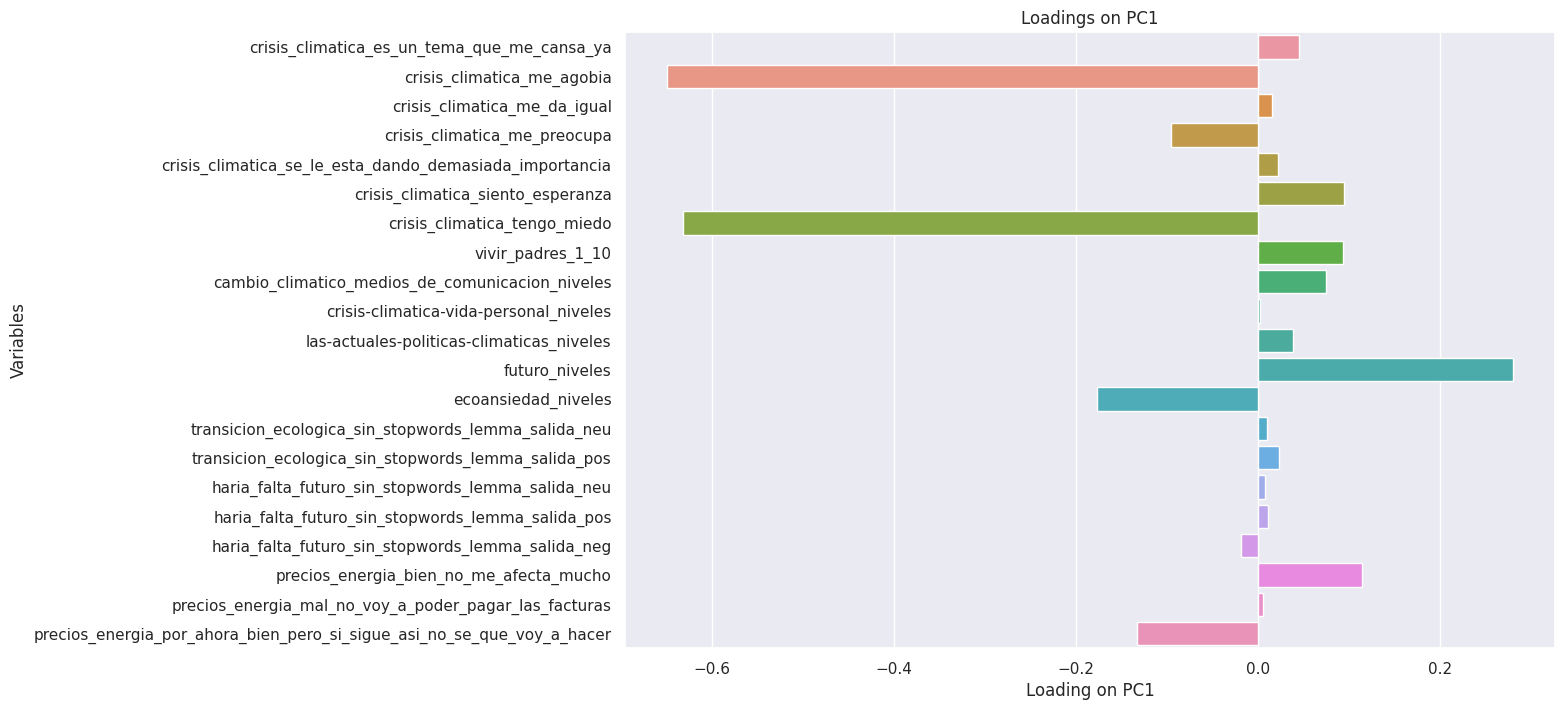

In [48]:
# Plot de los loadings para cada variable en cada componente
plt.figure(figsize=(12, 8))
sns.barplot(data=loadings_df.reset_index(), y='index', x='PC1')
plt.xlabel('Loading on PC1')
plt.ylabel('Variables')
plt.title('Loadings on PC1')
plt.show()


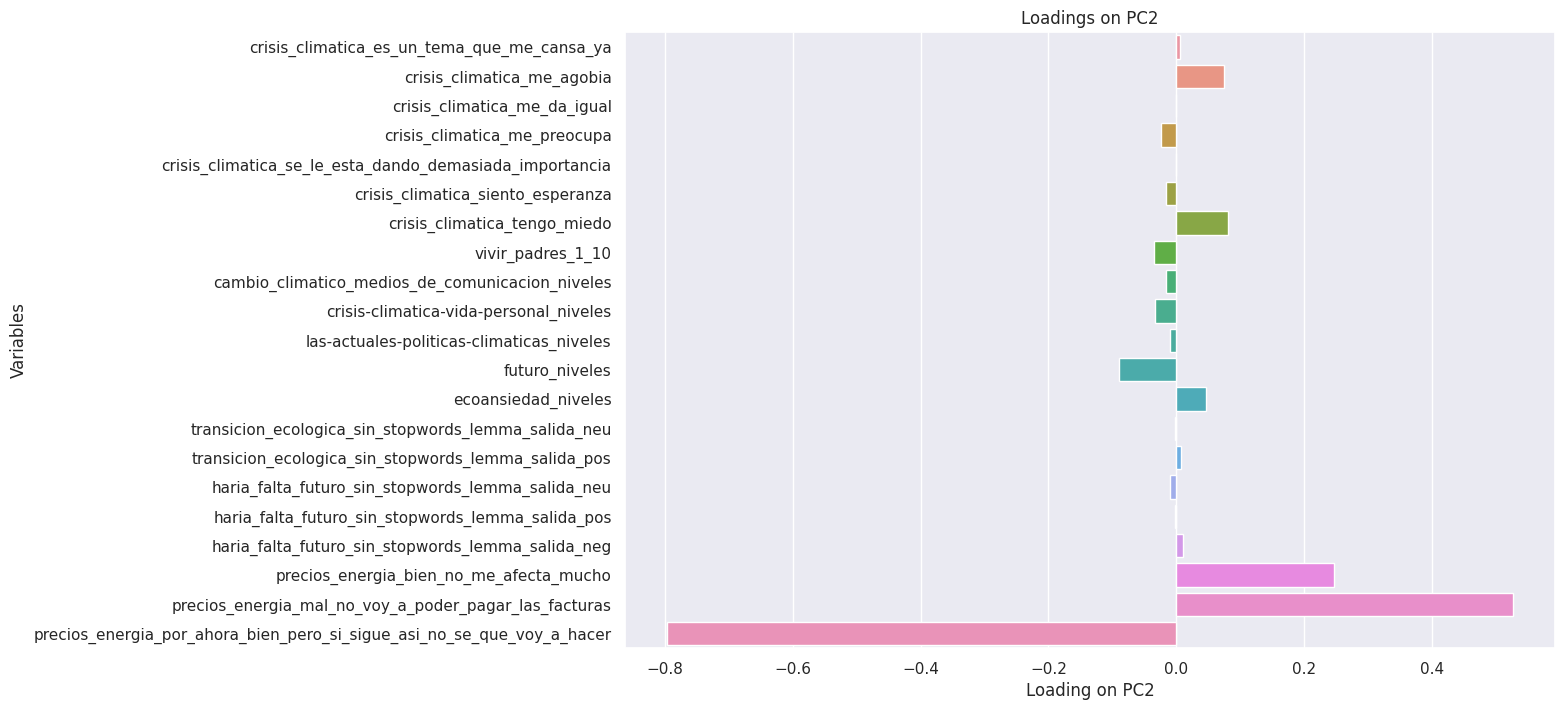

In [49]:
# Plot de los loadings para cada variable en cada componente
plt.figure(figsize=(12, 8))
sns.barplot(data=loadings_df.reset_index(), y='index', x='PC2')
plt.xlabel('Loading on PC2')
plt.ylabel('Variables')
plt.title('Loadings on PC2')
plt.show()

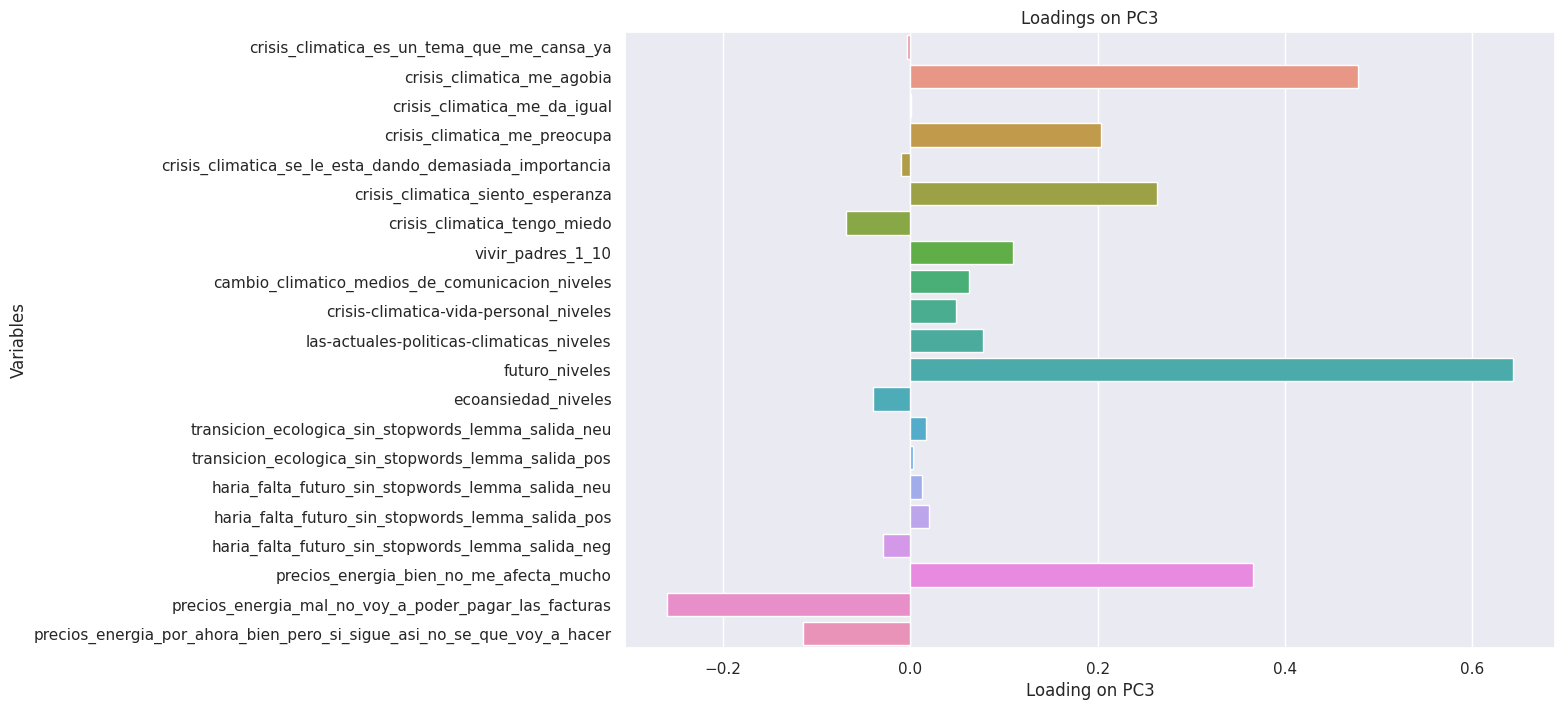

In [50]:
# Plot de los loadings para cada variable en cada componente
plt.figure(figsize=(12, 8))
sns.barplot(data=loadings_df.reset_index(), y='index', x='PC3')
plt.xlabel('Loading on PC3')
plt.ylabel('Variables')
plt.title('Loadings on PC3')
plt.show()


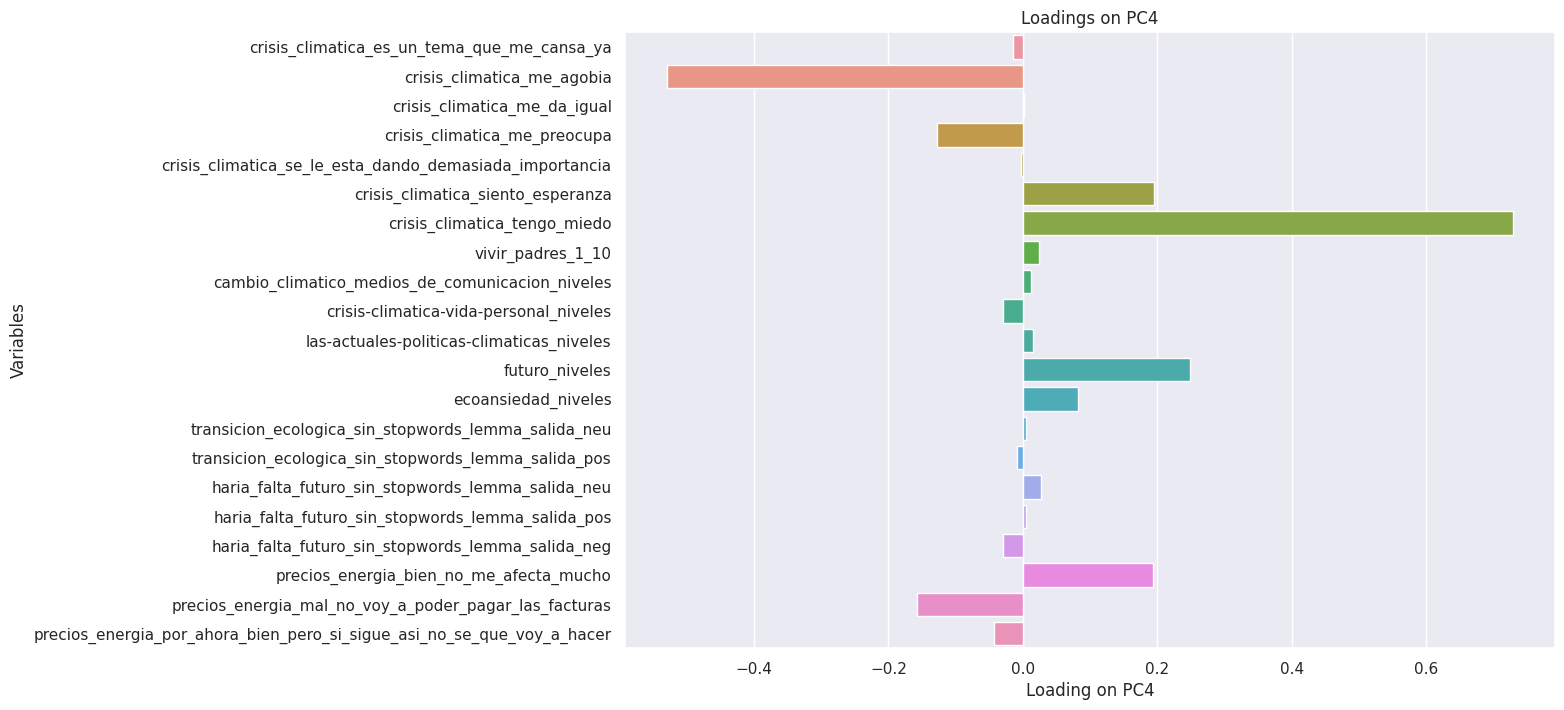

In [51]:
# Plot de los loadings para cada variable en cada componente
plt.figure(figsize=(12, 8))
sns.barplot(data=loadings_df.reset_index(), y='index', x='PC4')
plt.xlabel('Loading on PC4')
plt.ylabel('Variables')
plt.title('Loadings on PC4')
plt.show()

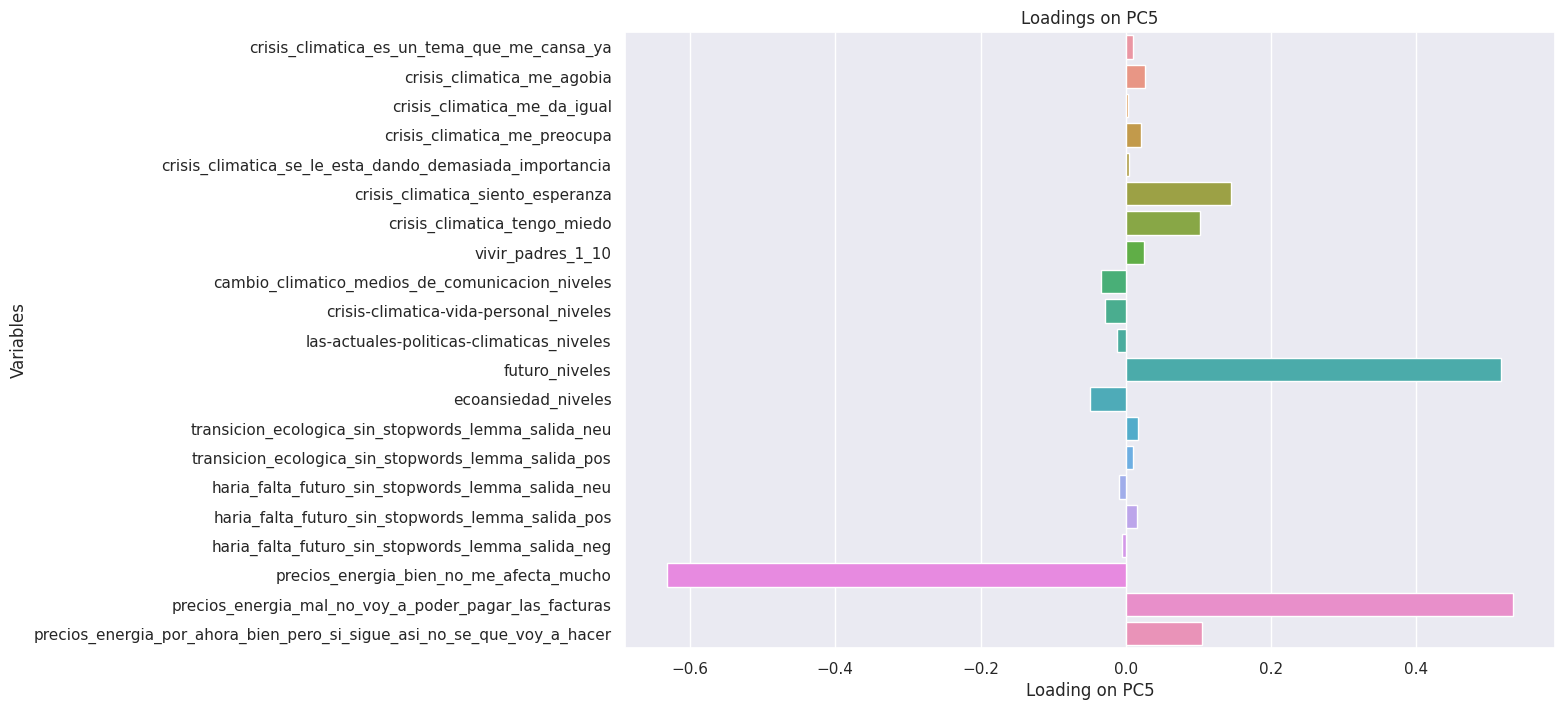

In [52]:
# Plot de los loadings para cada variable en cada componente
plt.figure(figsize=(12, 8))
sns.barplot(data=loadings_df.reset_index(), y='index', x='PC5')
plt.xlabel('Loading on PC5')
plt.ylabel('Variables')
plt.title('Loadings on PC5')
plt.show()


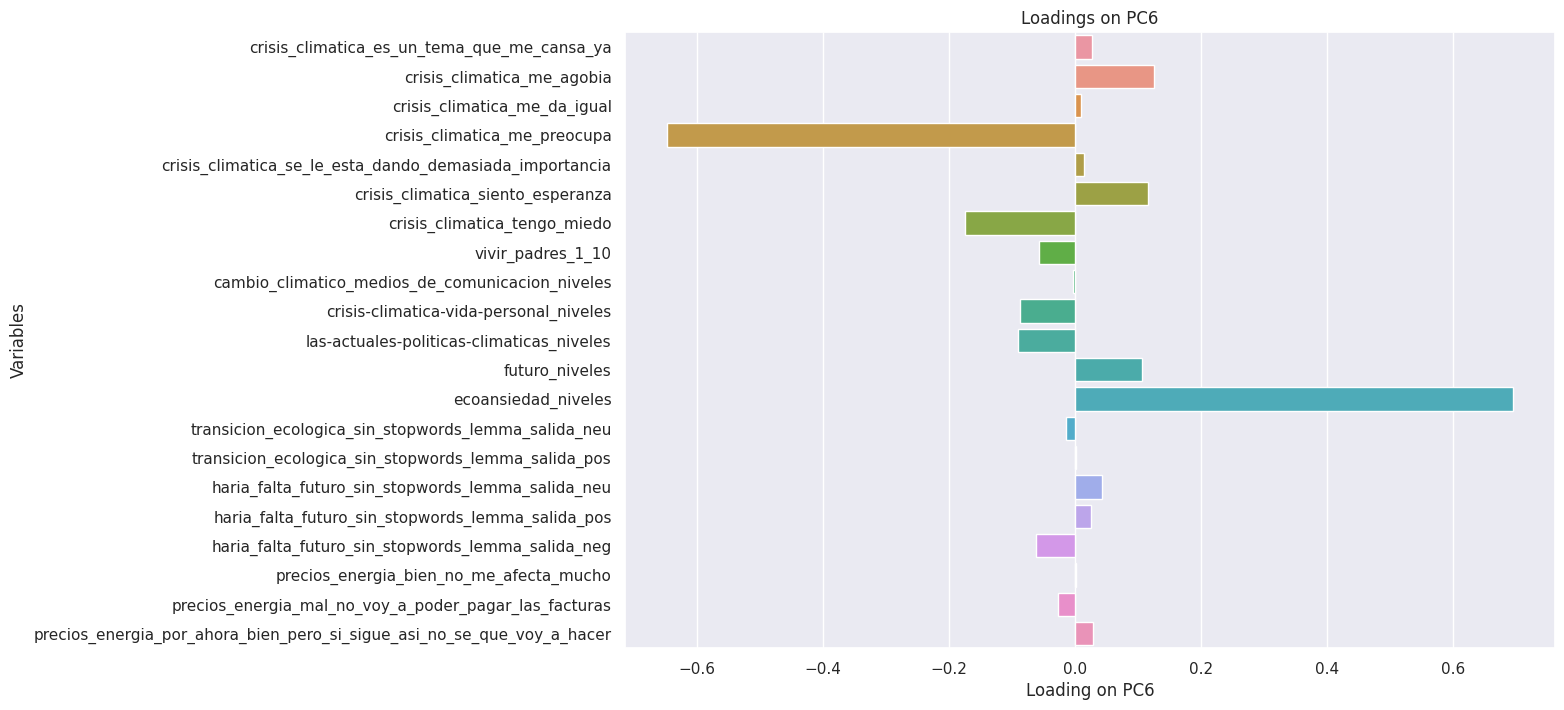

In [53]:
# Plot de los loadings para cada variable en cada componente
plt.figure(figsize=(12, 8))
sns.barplot(data=loadings_df.reset_index(), y='index', x='PC6')
plt.xlabel('Loading on PC6')
plt.ylabel('Variables')
plt.title('Loadings on PC6')
plt.show()


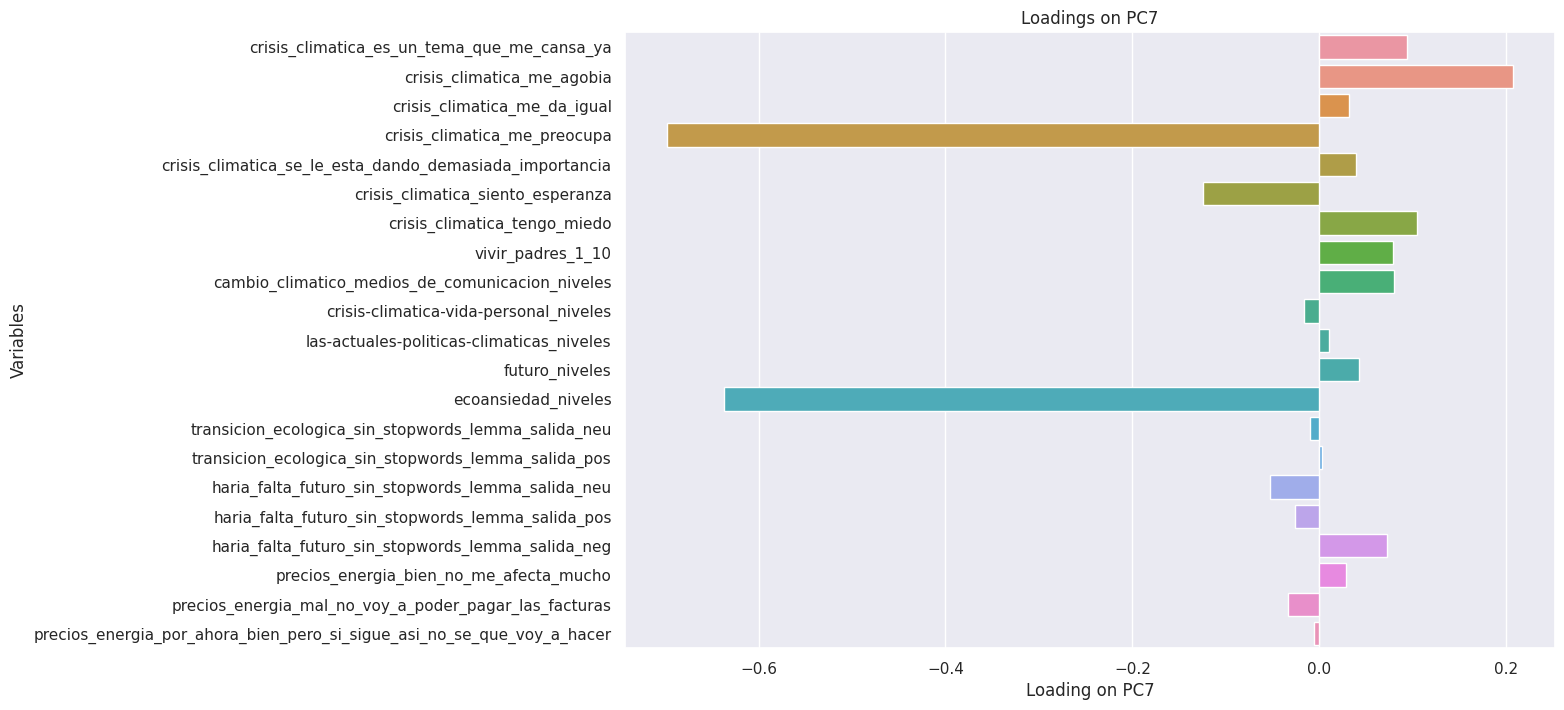

In [54]:
# Plot de los loadings para cada variable en cada componente
plt.figure(figsize=(12, 8))
sns.barplot(data=loadings_df.reset_index(), y='index', x='PC7')
plt.xlabel('Loading on PC7')
plt.ylabel('Variables')
plt.title('Loadings on PC7')
plt.show()

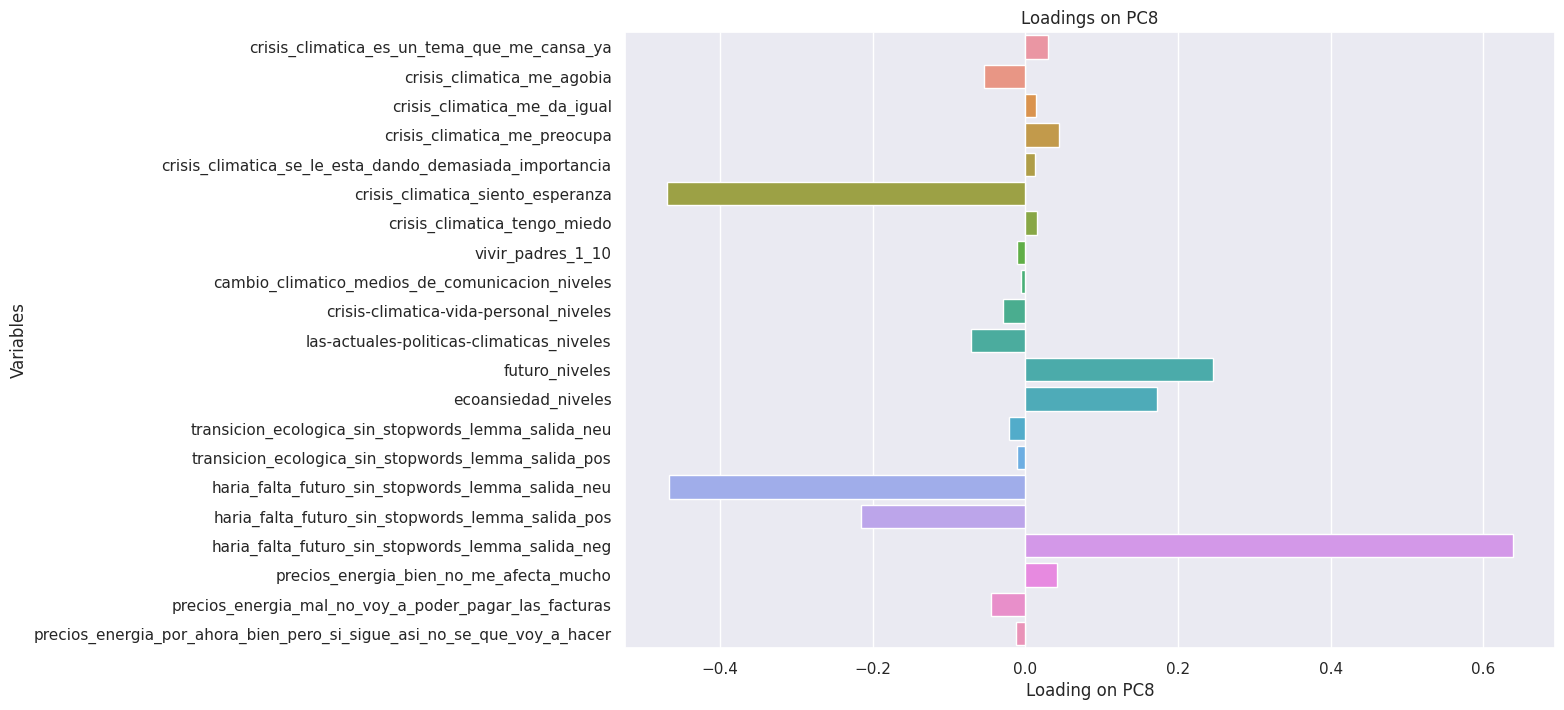

In [55]:
# Plot de los loadings para cada variable en cada componente
plt.figure(figsize=(12, 8))
sns.barplot(data=loadings_df.reset_index(), y='index', x='PC8')
plt.xlabel('Loading on PC8')
plt.ylabel('Variables')
plt.title('Loadings on PC8')
plt.show()

## Guardando resultados

In [56]:
loadings.to_csv('/content/gdrive/MyDrive/UCM/Mario/Data/el-futuro-es-clima-anonimizado_post_pca.csv', index=False)

In [57]:
result.to_csv('/content/gdrive/MyDrive/UCM/Mario/Data/el-futuro-es-clima-anonimizado_para_pca.csv', index=False)

El PCA en este caso es mejor que el analisis factorial puesto que al quedarnos con 8 componentes estamos explicando un 76.24% de la varianza, en el caso de AF al usar 8 factores no llegamos ni al 60%